# Multiclass classification 
In machine learning, multiclass or multinomial classification is the problem of classifying instances into one of three or more classes. [1](https://en.wikipedia.org/wiki/Multiclass_classification)

## Multiclass classification with logistic regression using OvR strategy

In [ ]:
import numpy as np
from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

multiple_classes_data = datasets.load_wine()

wine_train_data, wine_test_data, \
wine_train_target, wine_test_target = \
train_test_split(multiple_classes_data.data, multiple_classes_data.target, test_size=0.1)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
#initiate classifier
multiclass_classifier = OneVsRestClassifier(LogisticRegression())

#fit classifier
multiclass_classifier.fit(wine_train_data, wine_train_target);

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
conf_matrix = confusion_matrix(wine_test_target, multiclass_classifier.predict(wine_test_data))
print("Confusion_matrix:")
print(conf_matrix)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

### Recognizing hand-written digits with multiclass logistic regression (OvR strategy)

In [ ]:
import matplotlib.pyplot as plt

digits = datasets.load_digits()
print("Examples in dataset: ", digits.data.shape[0])

id = 37
plt.title("Number: " + str(digits.target[id]))
plt.imshow(digits.images[id], cmap=plt.cm.gray_r, interpolation='nearest')

print("Picture vectorization:\n", digits.data[id])
#freeze script and give control to new window! 
#plt.show()

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
digits_train_data, digits_test_data, \
digits_train_target, digits_test_target = \
train_test_split(digits.data, digits.target, test_size=0.2)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
digits_classifier = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))

digits_classifier.fit(digits_train_data, digits_train_target);

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
conf_matrix = confusion_matrix(digits_test_target, digits_classifier.predict(digits_test_data))
print("Confusion_matrix:")
print(conf_matrix)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
import seaborn as sns;
sns.heatmap(conf_matrix)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

### The CIFAR-10 dataset
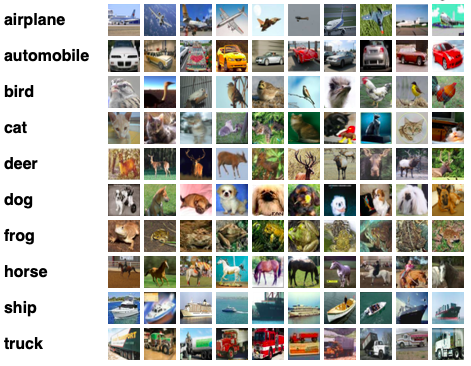
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images [2](https://www.cs.toronto.edu/~kriz/cifar.html)

### Learning recognizing objects with logistic regression with OvR strategy

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
images_train =  []
for image_train in x_train:
    images_train.append(image_train.flatten())

images_test = []

for image_test in x_test:
    images_test.append(image_test.flatten())

images_train = np.array(images_train)
images_test = np.array(images_test)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
cifar10_classifier = OneVsRestClassifier(LogisticRegression(verbose=1, max_iter=4))

cifar10_classifier.fit(images_train, y_train);

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
conf_matrix = confusion_matrix(y_test, cifar10_classifier.predict(images_test))
print("Confusion_matrix:")
print(conf_matrix)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
sns.heatmap(conf_matrix)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
cifar10_classifier.score(images_test, y_test)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

## Learning probability distribution across multiple classes with one classifier

In [ ]:
multi_class_cifar10_classifier = LogisticRegression(verbose=1, max_iter=10, multi_class="multinomial", solver="sag")

multi_class_cifar10_classifier.fit(images_train, y_train)

conf_matrix = confusion_matrix(y_test, multi_class_cifar10_classifier.predict(images_test))
print("Confusion_matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
multi_class_cifar10_classifier.score(images_test, y_test)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

## Model persistence

### - to save a model

In [ ]:
import pickle
pickle.dump(multi_class_cifar10_classifier, open('multi_class_cifar10_classifier.model', 'wb'));

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

### - to load a model

In [ ]:
multi_class_cifar10_classifier_from_file = pickle.load(open('multi_class_cifar10_classifier.model', 'rb'))

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

In [ ]:
conf_matrix = confusion_matrix(y_test, multi_class_cifar10_classifier_from_file.predict(images_test))
print("Confusion_matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix)

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

## Using trained model

In [ ]:
from keras.preprocessing import image
image_file = 'images_multimodal/cat2.jpg'
img = image.load_img(image_file, target_size=(32, 32))
x = image.img_to_array(img)
print(x.shape)
print(x.flatten())

print(multi_class_cifar10_classifier_from_file.predict(x.flatten().reshape(1,-1)))
print(multi_class_cifar10_classifier_from_file.predict_proba(x.flatten().reshape(1,-1)))

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

# Student work

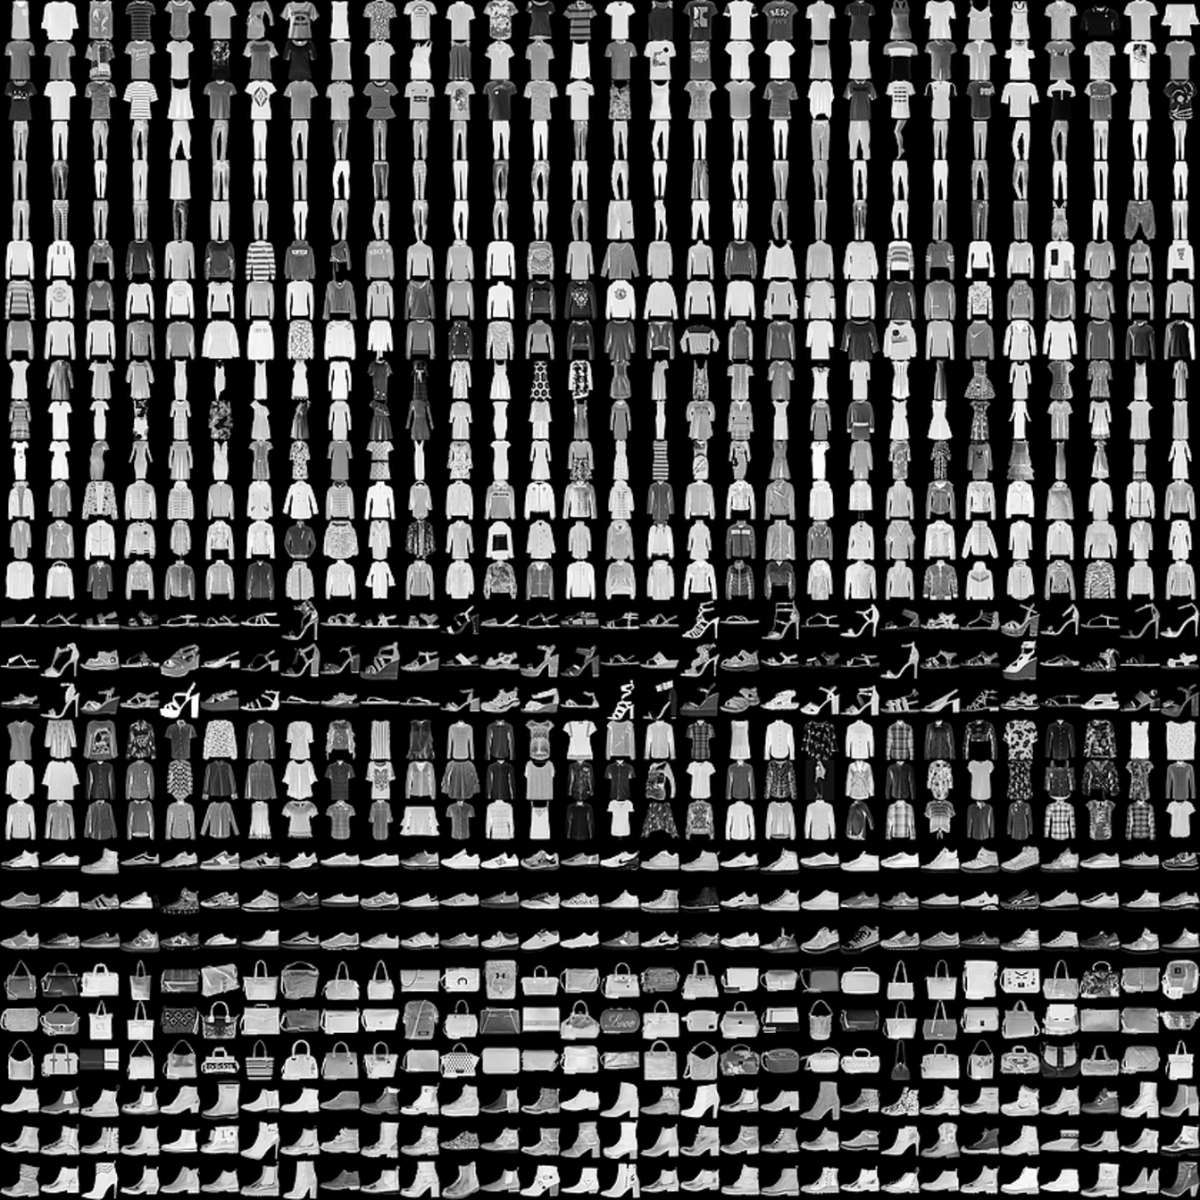

Train multiclass classifier for the __"Fashion-MNIST"__ database of fashion articles using: 
1. Binary logistic classifier and OvR strategy
2. Single logistic classifier by learning probability distribution across multiple classes 

Compare results and corresponding confussion matrix. 

The __"Fashion-MNIST"__ dataset consists of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images


Ids for garments:

`
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot`

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train[0].shape)

# ...

Error: Jupyter cannot be started. Error attempting to locate jupyter: 

# References
[1] https://en.wikipedia.org/wiki/Multiclass_classification 

[2] https://www.cs.toronto.edu/~kriz/cifar.html

If You're using Your own equipment please install Keras, Tensorflow and Seaborn: 
- `conda install -c conda-forge keras`
- `conda install -c anaconda seaborn`